In [1]:
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing()
housing_df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
housing_df['Target'] = housing.target

In [3]:
print("California Housing Data:")
print(housing_df.head())

California Housing Data:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
housing_scaled = pd.DataFrame(scaler.fit_transform(housing_df.drop(columns=['Target'])), columns=housing.feature_names)
housing_scaled['Target'] = housing_df['Target']

print("\nStandardized California Housing Data:")
print(housing_scaled.head())


Standardized California Housing Data:
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597  1.052548   
1  2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512  1.043185   
2  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843  1.038503   
3  0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329  1.038503   
4 -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616  1.038503   

   Longitude  Target  
0  -1.327835   4.526  
1  -1.322844   3.585  
2  -1.332827   3.521  
3  -1.337818   3.413  
4  -1.337818   3.422  


In [5]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Tách dữ liệu thành tập huấn luyện và kiểm tra
X = housing_scaled.drop(columns=['Target'])
y = housing_scaled['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình SVM hồi quy
svm_regressor = SVR(kernel='linear', C=1.0, epsilon=0.1)

# Huấn luyện mô hình
svm_regressor.fit(X_train, y_train)

# Dự đoán và đánh giá mô hình
y_pred = svm_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.5792504468442267
R-squared Score: 0.5579620893457127


Nghiệm Bài Toán

In [6]:
# Lấy giá trị trọng số (w) và bias (b)
# Trọng số w có thể tính từ các vector hỗ trợ và hệ số dual
w = svm_regressor.coef_[0]  # Với kernel tuyến tính, coef_ có sẵn
b = svm_regressor.intercept_[0]

print("Trọng số w:", w)
print("Bias b:", b)

Trọng số w: [ 0.91838451  0.08790949 -0.38561552  0.45379706  0.01096871 -0.5769625
 -0.75593718 -0.75236729]
Bias b: 1.9420498912786672


1. Biểu Đồ Phân Tích Dữ Liệu
Phân phối các đặc trưng: Biểu đồ histogram để phân tích phân phối của các đặc trưng.
Biểu đồ phân tán: Để xem mối quan hệ giữa các đặc trưng với biến mục tiêu (Target).

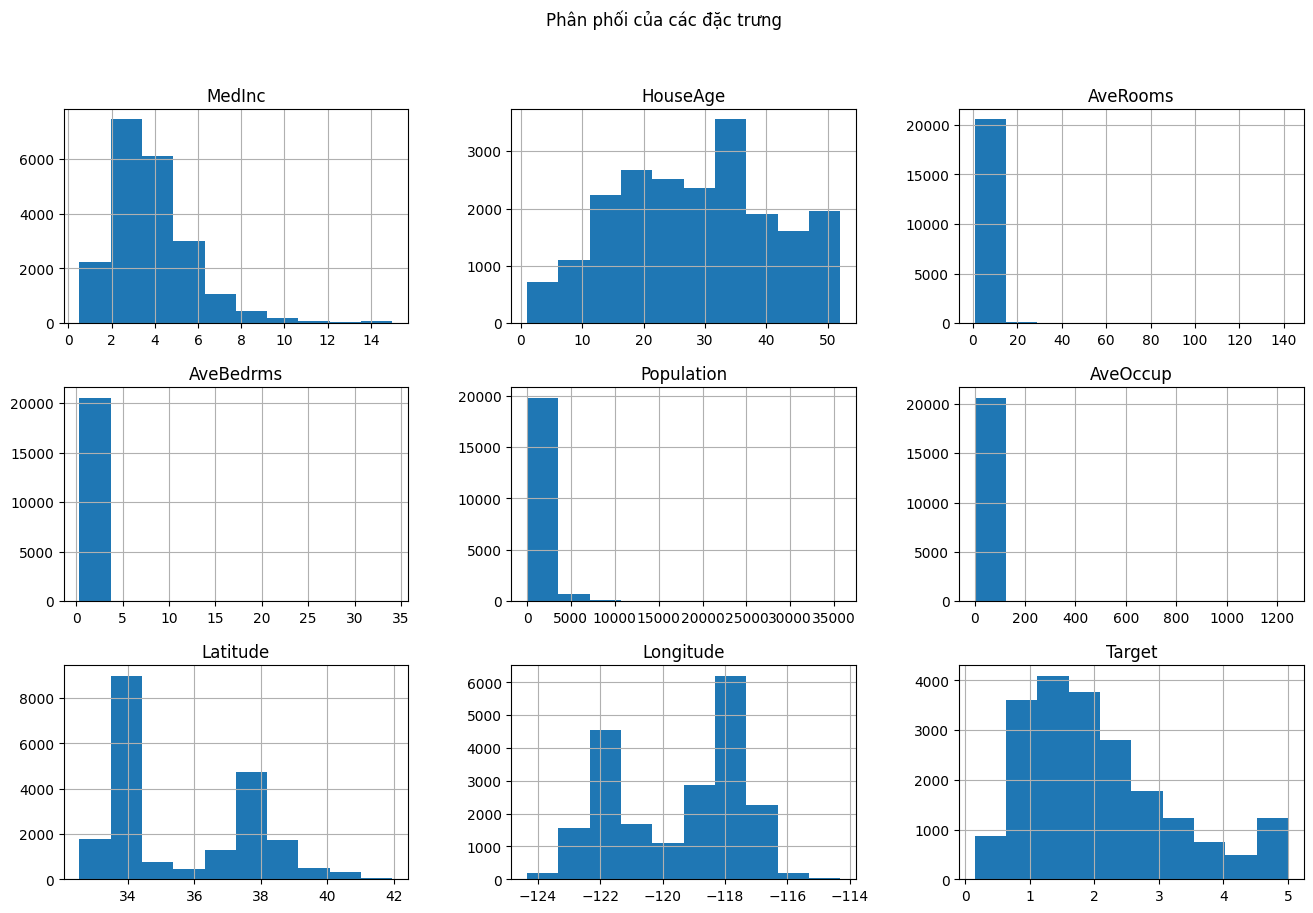

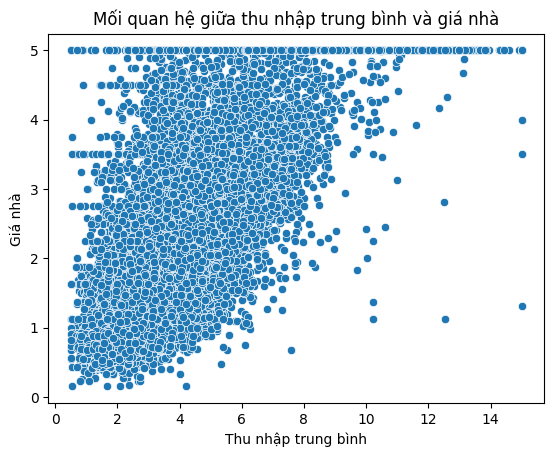

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Phân phối các đặc trưng
housing_df.hist(figsize=(16, 10))
plt.suptitle("Phân phối của các đặc trưng")
plt.show()

# Biểu đồ phân tán giữa một đặc trưng và giá mục tiêu
sns.scatterplot(x=housing_df['MedInc'], y=housing_df['Target'])
plt.title("Mối quan hệ giữa thu nhập trung bình và giá nhà")
plt.xlabel("Thu nhập trung bình")
plt.ylabel("Giá nhà")
plt.show()

2. Biểu Đồ Hiệu Quả Của Mô Hình
Biểu đồ so sánh giá trị thực tế và giá trị dự đoán: Dùng để trực quan hóa mức độ phù hợp của mô hình.
Residual plot (biểu đồ dư thừa): Để xem sự phân bố của lỗi dự đoán.

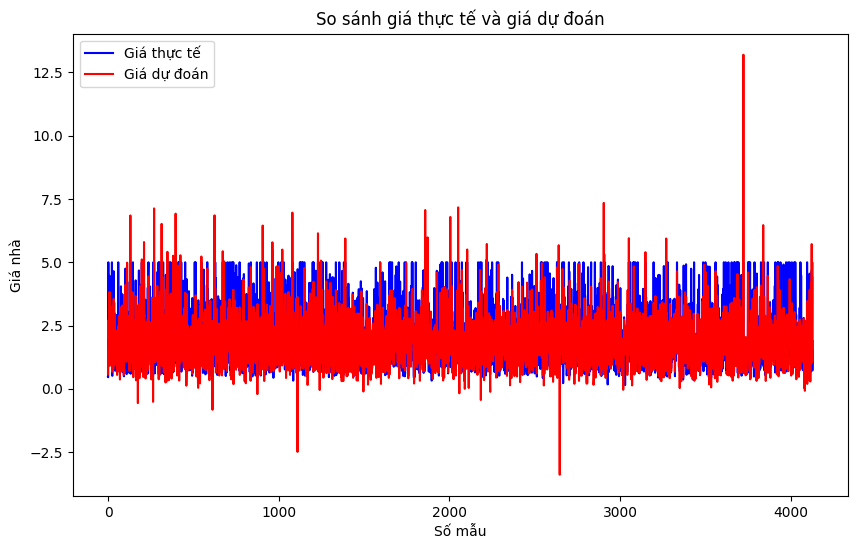

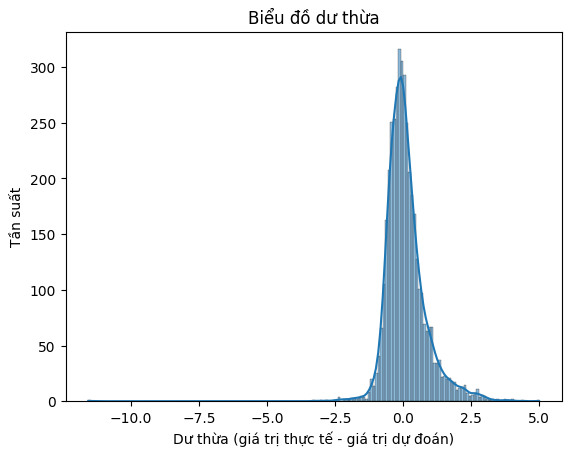

In [8]:
# Biểu đồ so sánh giá trị thực tế và dự đoán
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Giá thực tế', color='blue')
plt.plot(y_pred, label='Giá dự đoán', color='red')
plt.title("So sánh giá thực tế và giá dự đoán")
plt.xlabel("Số mẫu")
plt.ylabel("Giá nhà")
plt.legend()
plt.show()

# Biểu đồ dư thừa
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Biểu đồ dư thừa")
plt.xlabel("Dư thừa (giá trị thực tế - giá trị dự đoán)")
plt.ylabel("Tần suất")
plt.show()
